<a href="https://colab.research.google.com/github/massinoLight/tp_AlgoBD/blob/main/Tp1_AlgoBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
np.set_printoptions(threshold=np.inf, linewidth=np.nan)
import pandas as pd 
import warnings 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore') 

In [2]:
!wget -P /content/sample_data https://raw.githubusercontent.com/massinoLight/tp_AlgoBD/main/credit_scoring.csv

--2021-10-15 15:52:07--  https://raw.githubusercontent.com/massinoLight/tp_AlgoBD/main/credit_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292421 (286K) [text/plain]
Saving to: ‘/content/sample_data/credit_scoring.csv’

credit_scoring.csv  100%[===================>] 285.57K  --.-KB/s    in 0.03s   

2021-10-15 15:52:07 (8.48 MB/s) - ‘/content/sample_data/credit_scoring.csv’ saved [292421/292421]



# **1.1 Importer ce jeu de données avec la librairie**

In [3]:

data_credit_scoring = pd.read_csv('/content/sample_data/credit_scoring.csv')
#Transformer votre jeu de données issue de pandas qui sera de type Data Frame en numpy Array  
data_credit_scoring_array=data_credit_scoring.to_numpy()


data_credit_scoring_array.shape

data_credit_scoring_array
#le format des valeurs est en srt on va les passer au format int le tout dans un array 

array([['9.0;1.0;60.0;30.0;0.0;1.0;1.0;73.0;129.0;0.0;0.0;800.0;846.0;1'],
       ['17.0;1.0;60.0;58.0;1.0;1.0;0.0;48.0;131.0;0.0;0.0;1000.0;1658.0;1'],
       ['10.0;0.0;36.0;46.0;0.0;2.0;1.0;90.0;200.0;3000.0;0.0;2000.0;2985.0;0'],
       ['0.0;1.0;60.0;24.0;1.0;1.0;0.0;63.0;182.0;2500.0;0.0;900.0;1325.0;1'],
       ['0.0;1.0;36.0;26.0;1.0;1.0;0.0;46.0;107.0;0.0;0.0;310.0;910.0;1'],
       ['1.0;0.0;60.0;36.0;0.0;1.0;0.0;75.0;214.0;3500.0;0.0;650.0;1645.0;1'],
       ['29.0;0.0;60.0;44.0;0.0;1.0;0.0;75.0;125.0;10000.0;0.0;1600.0;1800.0;1'],
       ['9.0;1.0;12.0;27.0;1.0;1.0;0.0;35.0;80.0;0.0;0.0;200.0;1093.0;1'],
       ['0.0;0.0;60.0;32.0;0.0;1.0;1.0;90.0;107.0;15000.0;0.0;1200.0;1957.0;1'],
       ['0.0;1.0;48.0;41.0;0.0;1.0;1.0;90.0;80.0;0.0;0.0;1200.0;1468.0;0'],
       ['6.0;0.0;48.0;34.0;0.0;1.0;1.0;60.0;125.0;4000.0;0.0;1150.0;1577.0;1'],
       ['7.0;0.0;36.0;29.0;0.0;1.0;0.0;60.0;121.0;3000.0;0.0;650.0;915.0;1'],
       ['8.0;0.0;60.0;30.0;0.0;1.0;0.0;75.0;199.0;5000.0;2500

In [4]:
#les données sont sous form de 
w, h = len(data_credit_scoring_array[1][0].split(";")), len(data_credit_scoring_array)

data_credit_scoring_matrix = [[0 for x in range(w)] for y in range(h)]
for i in range(0,len(data_credit_scoring_array)):
    for j in range(0,14):
      data_credit_scoring_matrix[i][j]=int(float(data_credit_scoring_array[i][0].split(";")[j]))
    
   
            
print(data_credit_scoring_matrix)

[[9, 1, 60, 30, 0, 1, 1, 73, 129, 0, 0, 800, 846, 1], [17, 1, 60, 58, 1, 1, 0, 48, 131, 0, 0, 1000, 1658, 1], [10, 0, 36, 46, 0, 2, 1, 90, 200, 3000, 0, 2000, 2985, 0], [0, 1, 60, 24, 1, 1, 0, 63, 182, 2500, 0, 900, 1325, 1], [0, 1, 36, 26, 1, 1, 0, 46, 107, 0, 0, 310, 910, 1], [1, 0, 60, 36, 0, 1, 0, 75, 214, 3500, 0, 650, 1645, 1], [29, 0, 60, 44, 0, 1, 0, 75, 125, 10000, 0, 1600, 1800, 1], [9, 1, 12, 27, 1, 1, 0, 35, 80, 0, 0, 200, 1093, 1], [0, 0, 60, 32, 0, 1, 1, 90, 107, 15000, 0, 1200, 1957, 1], [0, 1, 48, 41, 0, 1, 1, 90, 80, 0, 0, 1200, 1468, 0], [6, 0, 48, 34, 0, 1, 1, 60, 125, 4000, 0, 1150, 1577, 1], [7, 0, 36, 29, 0, 1, 0, 60, 121, 3000, 0, 650, 915, 1], [8, 0, 60, 30, 0, 1, 0, 75, 199, 5000, 2500, 1500, 1650, 1], [19, 1, 36, 37, 0, 1, 0, 75, 170, 3500, 260, 600, 940, 1], [0, 1, 18, 21, 1, 2, 1, 35, 50, 0, 0, 400, 500, 0], [0, 0, 24, 68, 0, 1, 0, 75, 131, 4162, 0, 900, 1186, 1], [15, 1, 24, 52, 1, 1, 1, 35, 330, 16500, 0, 1500, 2201, 1], [33, 1, 24, 68, 0, 1, 1, 65, 200, 5

In [5]:

matrix_data = np.array(data_credit_scoring_matrix)
print (matrix_data)

[[     9      1     60     30      0      1      1     73    129      0      0    800    846      1]
 [    17      1     60     58      1      1      0     48    131      0      0   1000   1658      1]
 [    10      0     36     46      0      2      1     90    200   3000      0   2000   2985      0]
 [     0      1     60     24      1      1      0     63    182   2500      0    900   1325      1]
 [     0      1     36     26      1      1      0     46    107      0      0    310    910      1]
 [     1      0     60     36      0      1      0     75    214   3500      0    650   1645      1]
 [    29      0     60     44      0      1      0     75    125  10000      0   1600   1800      1]
 [     9      1     12     27      1      1      0     35     80      0      0    200   1093      1]
 [     0      0     60     32      0      1      1     90    107  15000      0   1200   1957      1]
 [     0      1     48     41      0      1      1     90     80      0      0   1200   146

# **1.2 *Analyser* les propriétés de vos données**

In [6]:
#les données sont sous format array et les valeurs sont en int 

matrix_data.shape

(4375, 14)

In [ ]:
pos=0
neg=0
for i in range (0,len(matrix_data)):
  for j in range(0,len(matrix_data[i])):
    if matrix_data[i][j]<0:
      neg=neg+1
    else:
      pos=pos+1  
print("nombre d’exemples positifs ",pos)
print("nombre d’exemples négatifs",neg)

nombre d’exemples positifs  61250
nombre d’exemples négatifs 0


# **1.3 Séparer les données en deux partie d’apprentissage/classifieur**

In [ ]:
#Séparer ensuite les variables caractéristiques de la variable à prédire (status) en deux tableaux différents (Methode 1)
test,training = matrix_data[:80,:], matrix_data[80:,:]
print(f"Training examples: {training.shape[0]}")
print(f"Testing examples: {test.shape[0]}")


Training examples: 4295
Testing examples: 80


In [7]:
#Séparer ensuite les variables caractéristiques de la variable à prédire (status) en deux tableaux différents (Methode 2)

from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(matrix_data, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 3500
No. of testing examples: 875


# 2.1 Classification And Regression Trees

**methode 1 sans affichage de graphe et avec les paraméres du classifier par defauts**

In [8]:
from sklearn.metrics import classification_report 
from sklearn import tree 
from sklearn.model_selection import train_test_split



y=[]
for i in range(0,len(matrix_data)):
  y.append(matrix_data[i][13])

# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(matrix_data, y, test_size=0.2, random_state=0)# 80% training and 20% test


# Fit the model
#model = tree.DecisionTreeClassifier()

model = tree.DecisionTreeClassifier(criterion='gini', 
                                        splitter='best', 
                                        max_depth=3,
                                        class_weight=None,
                                        min_samples_leaf=1000, 
                                        random_state=0, 
                                  )



clf = model.fit(X_train, y_train)

# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_)
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model

print('--------------------------------------------------------')
print("")
    
print('*************** Evaluation on Training Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model

print('--------------------------------------------------------')




*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  2
No. of leaves:  3
No. of features:  14
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.7177142857142857
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.7231428571428572
--------------------------------------------------------


In [9]:
clf.classes_[1]

1

In [10]:
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

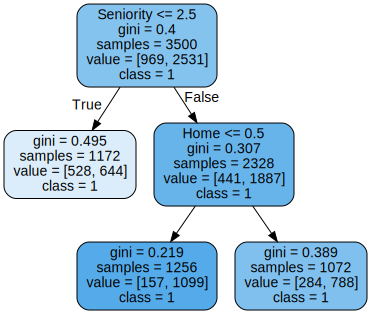

In [12]:
# Use graphviz to plot the tree
X=['Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records', 
      'Job', 'Expenses', 'Income', 'Assets', 'Debt',  
      'Amount', 'Price', 'Status']
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X, 
                                class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                                filled=True, 
                                rounded=True, 
                                #rotate=True,
                               ) 
graph = graphviz.Source(dot_data)
    
graph

# 2.2 KNN Classifier

**Mise en place de KNN avec k=5 et 70% de données pour l'entrainement et 30% des données pour le test**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import random

#on va reformer nos données de test et d'entrainement mais avec 70 30 
X_train, X_test, y_train, y_test = train_test_split(matrix_data, y, test_size=0.3, random_state=0)# 70% training and 30% test

#creer notre KNN avec k=5
knn = KNeighborsClassifier(n_neighbors=5)

#Entrainer notre modéle avec nos données d'entrainement 
knn.fit(X_train, y_train)

#Prediction a l'aide des données de test 
y_pred = knn.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


#Prediction d'une valeur prise aléatoirement 
r = np.asarray(matrix_data[random.randint(0,len(matrix_data))])
print("predire:",r)
predicted= model.predict([r])
print("Class:",predicted)



Accuracy: 0.7151561309977151
predire: [   3    1   60   31    0    1    1   70  102    0    0 1100 1305    1]
Class: [1]


## On remarque que l’accuracy des deux algorithmes est relativement similaire et egale a 71%

# 3 Normalisation des données 

In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
matrix_normaliz = scaler.fit_transform(matrix_data)
matrix_normaliz=matrix_normaliz.astype('float16')
matrix_normaliz

array([[ 1.2415e-01,  9.4482e-01,  9.2236e-01, -6.4014e-01, -6.0986e-01, -4.5605e-01,  1.3213e+00,  8.9502e-01, -2.1454e-02, -5.0098e-01, -2.8125e-01, -5.0537e-01, -9.8730e-01,  6.2061e-01],
       [ 1.1025e+00,  9.4482e-01,  9.2236e-01,  1.9121e+00,  1.6396e+00, -4.5605e-01, -7.5684e-01, -3.9062e-01,  1.7529e-03, -5.0098e-01, -2.8125e-01, -7.9773e-02,  3.1885e-01,  6.2061e-01],
       [ 2.4658e-01, -1.0586e+00, -7.1973e-01,  8.1836e-01, -6.0986e-01,  2.1934e+00,  1.3213e+00,  1.7686e+00,  8.0225e-01, -2.1716e-01, -2.8125e-01,  2.0488e+00,  2.4531e+00, -1.6113e+00],
       [-9.7705e-01,  9.4482e-01,  9.2236e-01, -1.1865e+00,  1.6396e+00, -4.5605e-01, -7.5684e-01,  3.8062e-01,  5.9326e-01, -2.6440e-01, -2.8125e-01, -2.9272e-01, -2.1667e-01,  6.2061e-01],
       [-9.7705e-01,  9.4482e-01, -7.1973e-01, -1.0049e+00,  1.6396e+00, -4.5605e-01, -7.5684e-01, -4.9341e-01, -2.7661e-01, -5.0098e-01, -2.8125e-01, -1.5488e+00, -8.8428e-01,  6.2061e-01],
       [-8.5449e-01, -1.0586e+00,  9.2236e-01

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(matrix_normaliz, y, test_size=0.2, random_state=0)# 80% training and 20% test


mode2 =DecisionTreeClassifier()



clf = mode2.fit(X_train, y_train)
print(clf)
# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_)
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model

print('--------------------------------------------------------')
print("")
    
print('*************** Evaluation on Training Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model

print('--------------------------------------------------------')





DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  1
No. of leaves:  2
No. of features:  14
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.7177142857142857
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.7231428571428572
--------------------------------------------------------


# Avec MinMax

In [14]:
scaler = MinMaxScaler()

matrix_normaliz_minmax = scaler.fit_transform(matrix_data)
print(matrix_normaliz_minmax)

[[1.87500000e-01 1.00000000e+00 8.18181818e-01 2.40000000e-01 0.00000000e+00 0.00000000e+00 1.00000000e+00 2.75362319e-01 1.34515120e-01 0.00000000e+00 0.00000000e+00 1.59090909e-01 6.71499773e-02 1.00000000e+00]
 [3.54166667e-01 1.00000000e+00 8.18181818e-01 8.00000000e-01 1.00000000e+00 0.00000000e+00 0.00000000e+00 9.42028986e-02 1.36600626e-01 0.00000000e+00 0.00000000e+00 2.04545455e-01 1.40734028e-01 1.00000000e+00]
 [2.08333333e-01 0.00000000e+00 4.54545455e-01 5.60000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00 3.98550725e-01 2.08550574e-01 1.20000000e-02 0.00000000e+00 4.31818182e-01 2.60987766e-01 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 8.18181818e-01 1.20000000e-01 1.00000000e+00 0.00000000e+00 0.00000000e+00 2.02898551e-01 1.89781022e-01 1.00000000e-02 0.00000000e+00 1.81818182e-01 1.10557318e-01 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 4.54545455e-01 1.60000000e-01 1.00000000e+00 0.00000000e+00 0.00000000e+00 7.97101449e-02 1.11574557e-01 0.00000000e

In [18]:
# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(matrix_normaliz_minmax, y, test_size=0.2, random_state=0)# 80% training and 20% test


mode2 =DecisionTreeClassifier()



clf = mode2.fit(X_train, y_train)
print(clf)
# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_)
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model

print('--------------------------------------------------------')
print("")
    
print('*************** Evaluation on Training Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model

print('--------------------------------------------------------')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  1
No. of leaves:  2
No. of features:  14
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.7177142857142857
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.7231428571428572
--------------------------------------------------------


In [19]:
# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(matrix_normaliz, y, test_size=0.2, random_state=0)# 80% training and 20% test


knn = KNeighborsClassifier(n_neighbors=5)

#Entrainer notre modéle avec nos données d'entrainement 
knn.fit(X_train, y_train)

#Prediction a l'aide des données de test 
y_pred = knn.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


#Prediction d'une valeur prise aléatoirement 
r = np.asarray(matrix_data[random.randint(0,len(matrix_data))])
print("predire:",r)
predicted= model.predict([r])
print("Class:",predicted)

Accuracy: 0.9965714285714286
predire: [    3     0    60    38     0     1     1    60   100 18000     0  1500  2360     1]
Class: [1]


# avec MinMax

In [20]:
#on va reformer nos données de test et d'entrainement mais avec 70 30 
X_train, X_test, y_train, y_test = train_test_split(matrix_normaliz_minmax, y, test_size=0.3, random_state=0)# 70% training and 30% test

#creer notre KNN avec k=5
knn = KNeighborsClassifier(n_neighbors=5)

#Entrainer notre modéle avec nos données d'entrainement 
knn.fit(X_train, y_train)

#Prediction a l'aide des données de test 
y_pred = knn.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


#Prediction d'une valeur prise aléatoirement 
r = np.asarray(matrix_data[random.randint(0,len(matrix_data))])
print("predire:",r)
predicted= model.predict([r])
print("Class:",predicted)


Accuracy: 1.0
predire: [   3    1   60   23    1    1    0   35  107    0    0  800 1111    1]
Class: [1]


#on remarque que la precision pour ce modéle est bien meilleure avec des données normaliséés et elle l'est encore plus( 100% )lorsque il s'aagit de normalisation MinMax 

# 4 Création	de	nouvelles	variables	caractéristiques	par	combinaisons	linéaires	des	variables	initiales	

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(matrix_data)
print(principalComponents)

[[-5.31352998e+03 -2.32221787e+02]
 [-5.30172692e+03 -2.27433703e+02]
 [-2.27872759e+03 -2.76910455e+02]
 [-2.80748311e+03 -2.83419478e+02]
 [-5.31612629e+03 -2.37443273e+02]
 [-1.80540763e+03 -3.06551371e+02]
 [ 4.70084834e+03 -4.37144365e+02]
 [-5.31456997e+03 -2.38217280e+02]
 [ 9.69837217e+03 -5.49333551e+02]
 [-5.30284316e+03 -2.26180525e+02]
 [-1.30309497e+03 -3.12749922e+02]
 [-2.31470765e+03 -2.98669152e+02]
 [-2.46143602e+02  2.16925675e+03]
 [-1.80924034e+03 -4.97613531e+01]
 [-5.32082794e+03 -2.38160384e+02]
 [-1.14787578e+03 -3.20242568e+02]
 [ 1.12033434e+04 -5.76564796e+02]
 [-2.66970409e+02  1.65866614e+03]
 [-4.55318049e+03 -2.43077079e+02]
 [-5.30519048e+03 -2.26002728e+02]
 [-5.29149699e+03 -2.20419467e+02]
 [ 4.68940057e+03 -4.43446103e+02]
 [-3.29860854e+03  2.23626114e+02]
 [-5.30412799e+03 -2.28429564e+02]
 [-1.80433661e+03 -3.00389375e+02]
 [-1.29949091e+03 -3.15891656e+02]
 [-1.31056465e+03 -3.15698741e+02]
 [-1.28587715e+03 -3.01830054e+02]
 [-3.06992074e+02 -3

**on entraine notre modéle avec des données avec des pca et on test sur notre jeux de données entier **

In [32]:
# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.2, random_state=0)# 80% training and 20% test


mode2 =DecisionTreeClassifier()



clf = mode2.fit(X_train, y_train)
print(clf)
# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_)
print('--------------------------------------------------------')
print("")

X_train, X_test, y_train, y_test = train_test_split(matrix_data, y, test_size=0.2, random_state=0)# 80% training and 20% test

print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model

print('--------------------------------------------------------')
print("")
    
print('*************** Evaluation on Training Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model

print('--------------------------------------------------------')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  40
No. of leaves:  991
No. of features:  2
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.7177142857142857
--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.7231428571428572
--------------------------------------------------------


In [31]:
#on va reformer nos données de test et d'entrainement mais avec 70 30 
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.3, random_state=0)# 70% training and 30% test

#creer notre KNN avec k=5
knn = KNeighborsClassifier(n_neighbors=5)

#Entrainer notre modéle avec nos données d'entrainement 
knn.fit(X_train, y_train)

#Prediction a l'aide des données de test 
y_pred = knn.predict(X_test)
 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


#Prediction d'une valeur prise aléatoirement 
r = np.asarray(matrix_data[random.randint(0,len(matrix_data))])
print("predire:",r)
predicted= model.predict([r])
print("Class:",predicted)


Accuracy: 0.6984006092916984
predire: [   0    0   12   21    1    1    0   35  147 1500    0  350  350    1]
Class: [1]
